## Notebook to use collected data to train LSTM and evaulate performance


In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation
import cv2
import torch
import pickle as pickle
import numpy as np
import time

### Load Data

In [2]:
start = time.time()
A=pickle.load(open('/home/azav/results/saved_data_training_differentroom.p', 'rb'))
print('load time', time.time() - start)

('load time', 59.57691287994385)


In [3]:
#8ebbcef658d322fe0f945db7835cbb7be9ff6bc8293023d0

In [4]:
device = ('cuda:0')
for i in range(len(A)):
    print(i)
    A[i][0] = A[i][0].to(device)
    for j in range(len(A[i][1])):
        A[i][1][j] = A[i][1][j].to(device)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [5]:
A[0][0]\

tensor([[[[0.3333, 0.3412, 0.3412,  ..., 0.2667, 0.2549, 0.3098],
          [0.3373, 0.3294, 0.3333,  ..., 0.3451, 0.2431, 0.2549],
          [0.3294, 0.3451, 0.3412,  ..., 0.3373, 0.2902, 0.2667],
          ...,
          [0.3216, 0.3059, 0.2824,  ..., 0.2510, 0.2588, 0.2863],
          [0.2941, 0.2667, 0.2627,  ..., 0.2863, 0.3059, 0.3176],
          [0.3686, 0.3255, 0.3059,  ..., 0.2980, 0.2784, 0.3020]],

         [[0.2784, 0.2902, 0.2863,  ..., 0.2667, 0.2471, 0.3059],
          [0.2784, 0.2824, 0.2824,  ..., 0.3412, 0.2431, 0.2588],
          [0.2706, 0.2863, 0.2863,  ..., 0.3373, 0.2902, 0.2706],
          ...,
          [0.3216, 0.3059, 0.2784,  ..., 0.2510, 0.2588, 0.2863],
          [0.2902, 0.2667, 0.2549,  ..., 0.2863, 0.3059, 0.3176],
          [0.3490, 0.3176, 0.3020,  ..., 0.2980, 0.2745, 0.2980]],

         [[0.1529, 0.1843, 0.1804,  ..., 0.2784, 0.2588, 0.3137],
          [0.1569, 0.1725, 0.1647,  ..., 0.3412, 0.2471, 0.2627],
          [0.1412, 0.1686, 0.1686,  ..., 0

### A[i][0] contains all the images in the ith room as a single tensor of shape [No. of. images collected,3,256,256]

#### Example 148 and 155 images in 3rd and 4th room : 

In [6]:
print(A[3][0].shape,A[4][0].shape)

(torch.Size([150, 3, 256, 256]), torch.Size([150, 3, 256, 256]))


### A[i][1] contains xy points corresponding to the collecetd images (list of tensors attached to gpu, do : torch.cat(A[i][1]) for a single tensor in the ith room
#### Shape is [no of Images in ith room, 2]

In [7]:
for i in range(len(A)):
    print(len(A[i][2]))
    print(A[i][0].shape)

66
torch.Size([150, 3, 256, 256])
68
torch.Size([150, 3, 256, 256])
65
torch.Size([148, 3, 256, 256])
66
torch.Size([150, 3, 256, 256])
69
torch.Size([150, 3, 256, 256])
55
torch.Size([157, 3, 256, 256])
65
torch.Size([155, 3, 256, 256])
67
torch.Size([152, 3, 256, 256])
66
torch.Size([148, 3, 256, 256])
67
torch.Size([155, 3, 256, 256])
64
torch.Size([152, 3, 256, 256])
72
torch.Size([148, 3, 256, 256])
67
torch.Size([149, 3, 256, 256])
67
torch.Size([149, 3, 256, 256])
66
torch.Size([148, 3, 256, 256])
71
torch.Size([147, 3, 256, 256])
66
torch.Size([149, 3, 256, 256])
67
torch.Size([149, 3, 256, 256])
66
torch.Size([152, 3, 256, 256])
68
torch.Size([148, 3, 256, 256])


In [8]:
all_train_pos = []
all_train_labels = []

for i in range(len(A)):
    for _, label, pos in A[i][2]:
        all_train_pos.append(pos)
        all_train_labels.append(label)
first_train_pos = []
first_train_labels = []

for i in range(15):
    for _, label, pos in A[i][2]:
        first_train_pos.append(pos)
        first_train_labels.append(label)
        
val_train_pos = []
val_train_labels = []

for i in range(15,len(A)):
    for _, label, pos in A[i][2]:
        val_train_pos.append(pos)
        val_train_labels.append(label)

### A[i][2][Sample Number] is a list of the format : [probe point image number,label,[probe point x,probe point y]]

#### Example : In the 3rd room the 10th Sample was collected when the drone saw the 24th image

In [9]:
A[3][2][10]

[26, 0.0, [0.9097335455933325, 0.12177316579479285]]

The point corresponding to the 23rd image is approximately same as the 10th probe point

In [10]:
A[3][1][22:25]

[tensor([[-1.5487, -0.1573]], device='cuda:0'),
 tensor([[-0.4464, -0.0360]], device='cuda:0'),
 tensor([[0.6605, 0.0878]], device='cuda:0')]

Trajectory points, dashed with probe points, red

In [11]:
len(A)

20

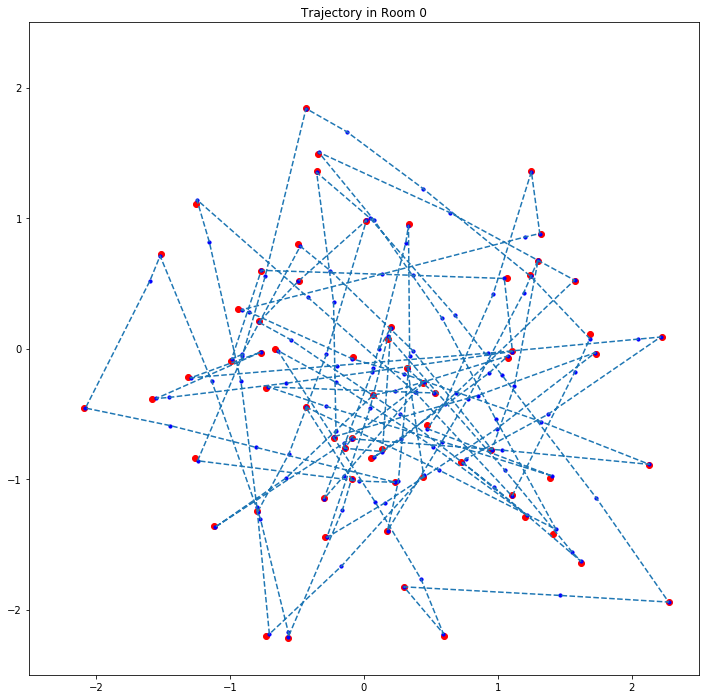

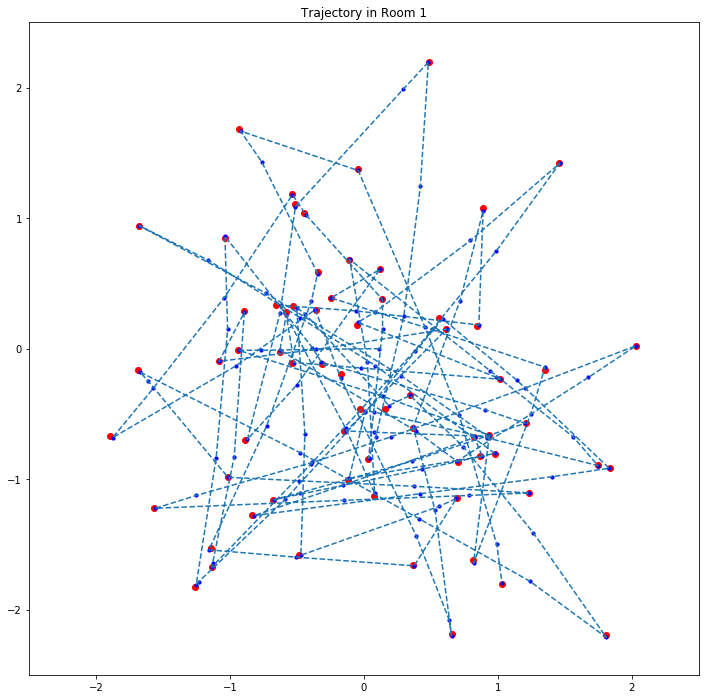

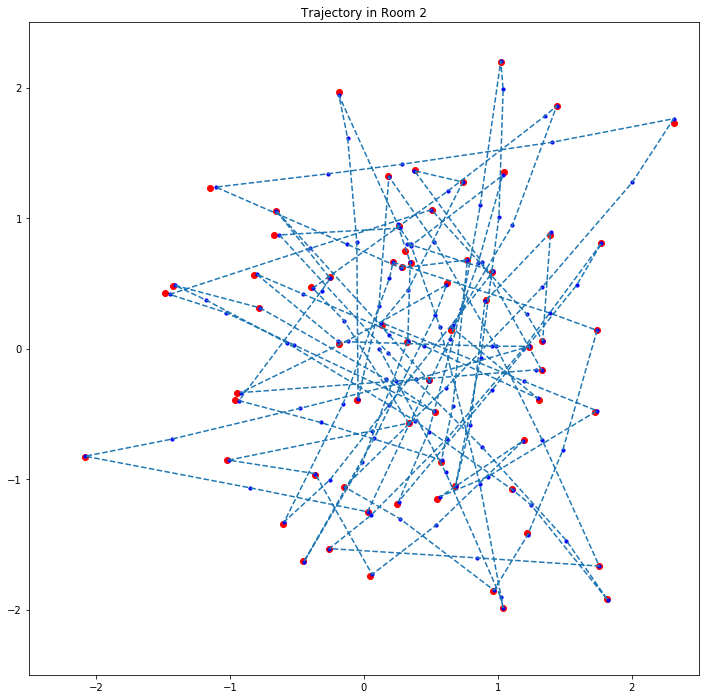

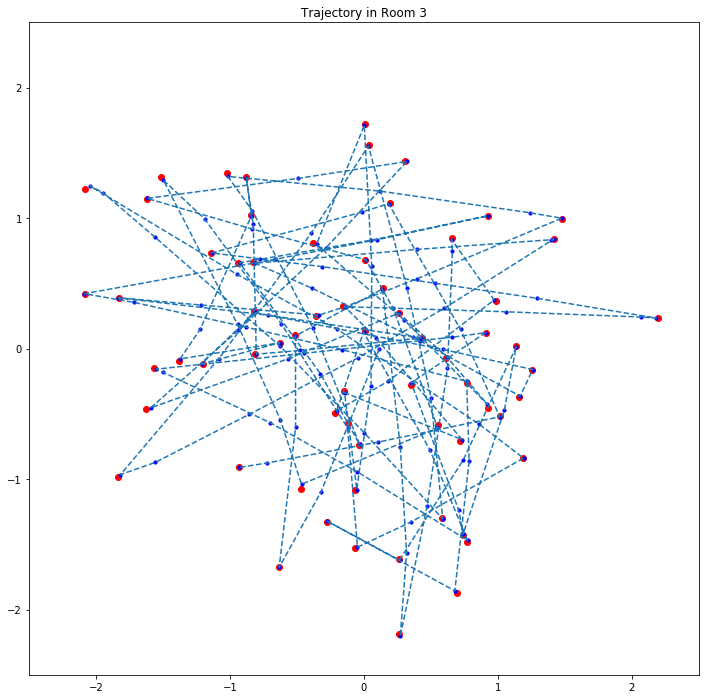

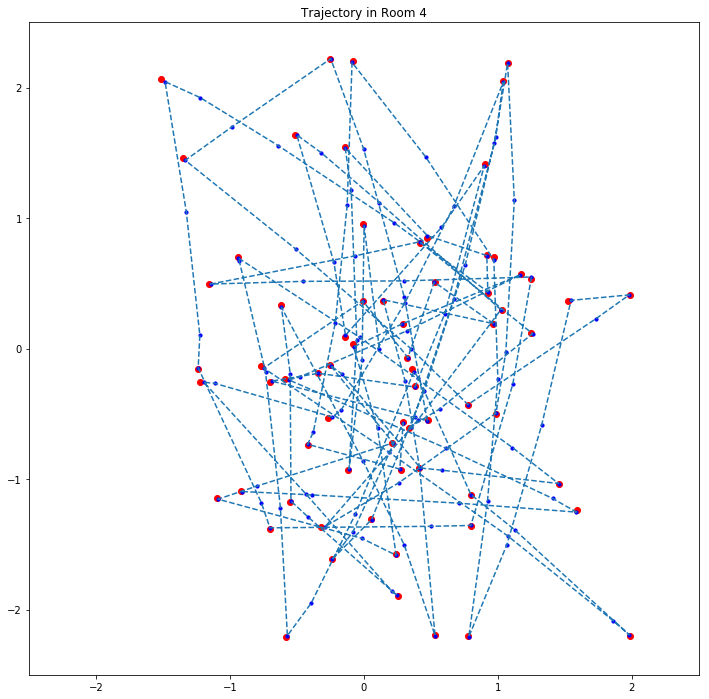

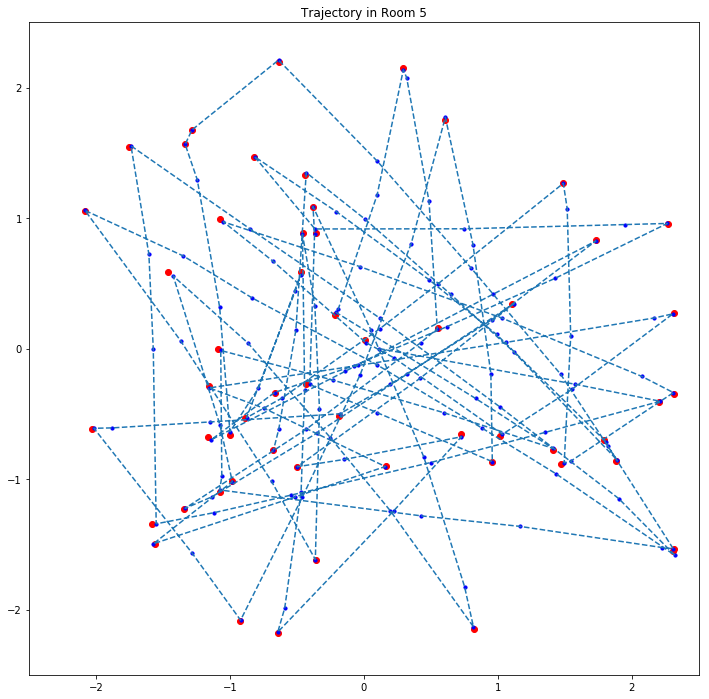

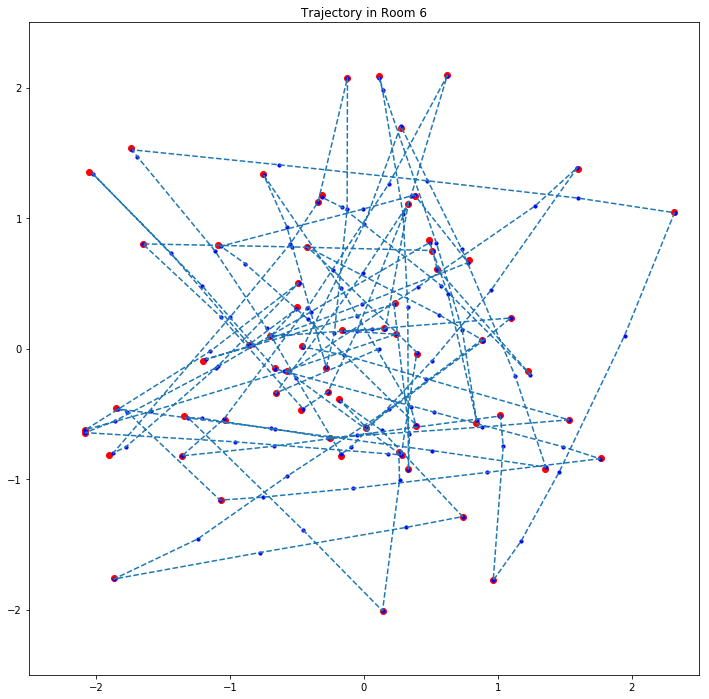

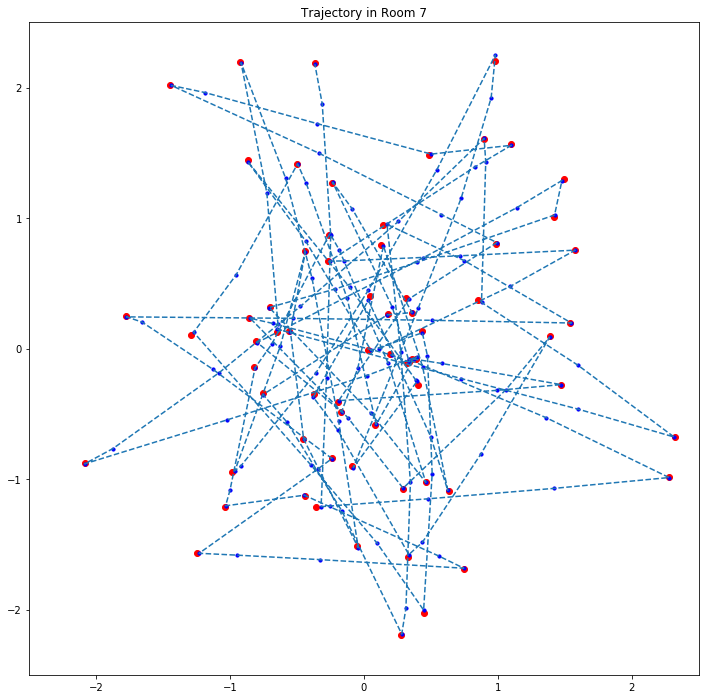

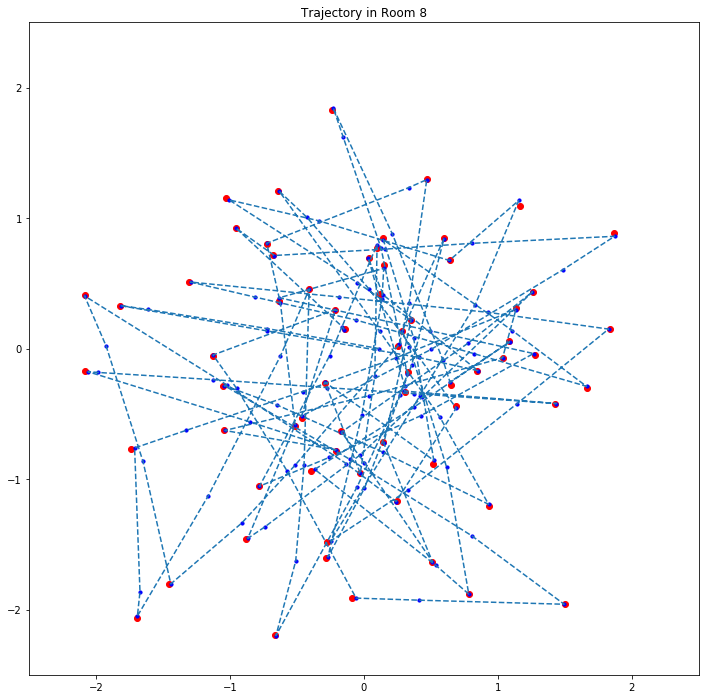

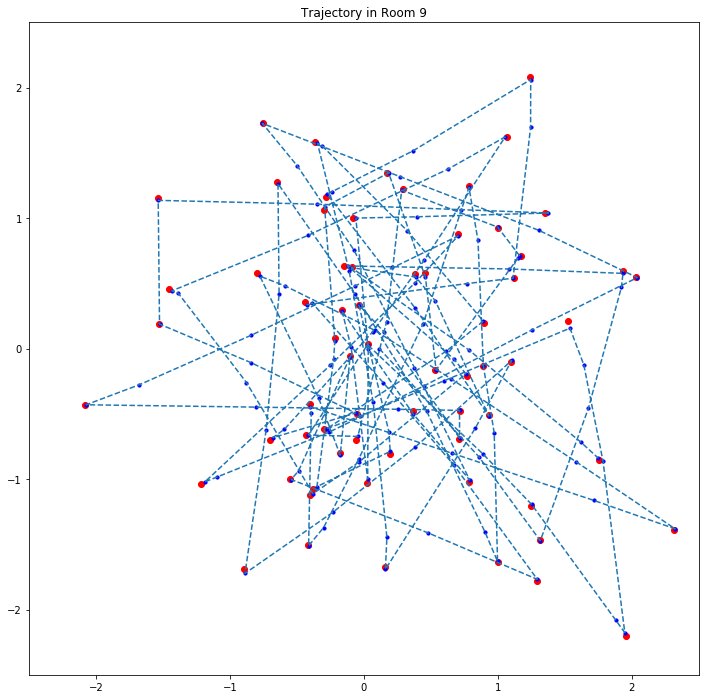

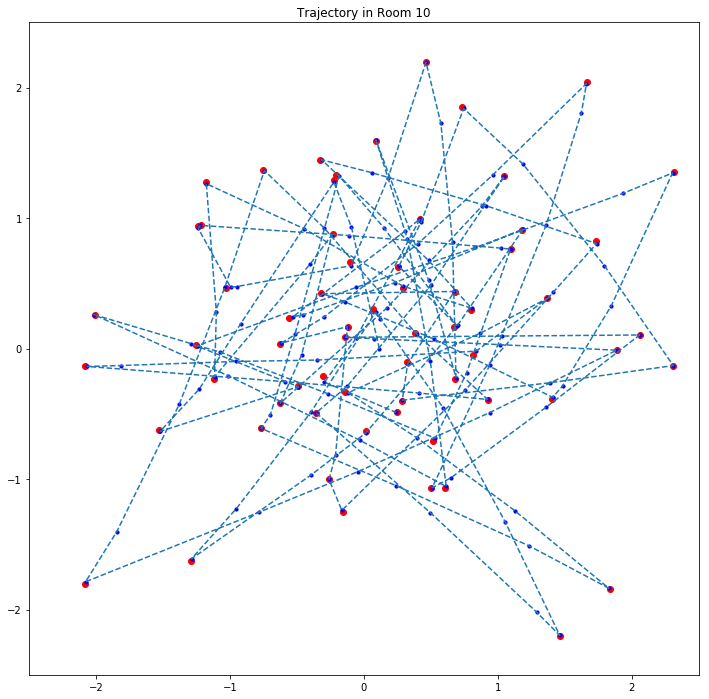

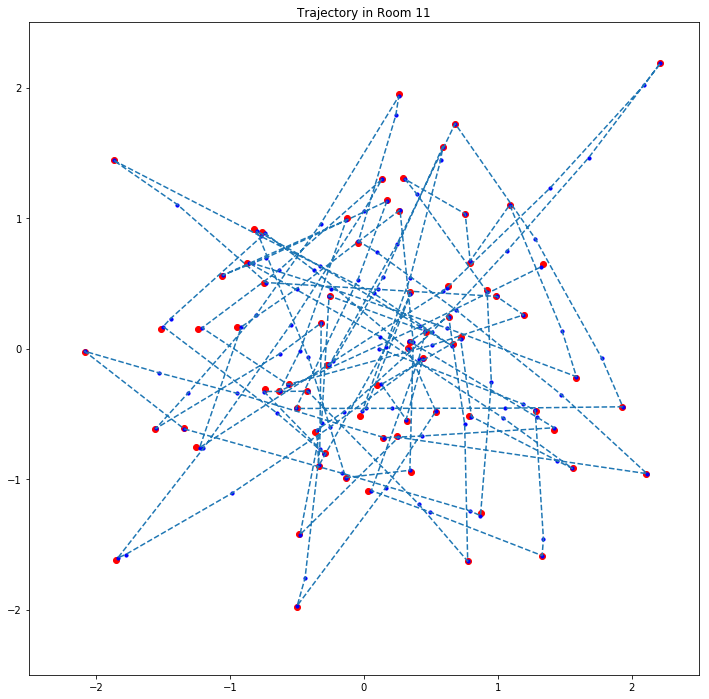

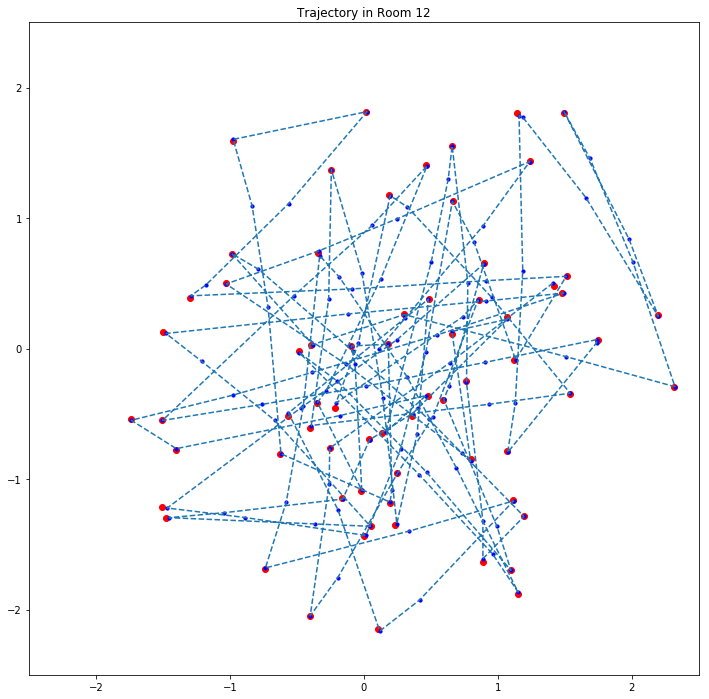

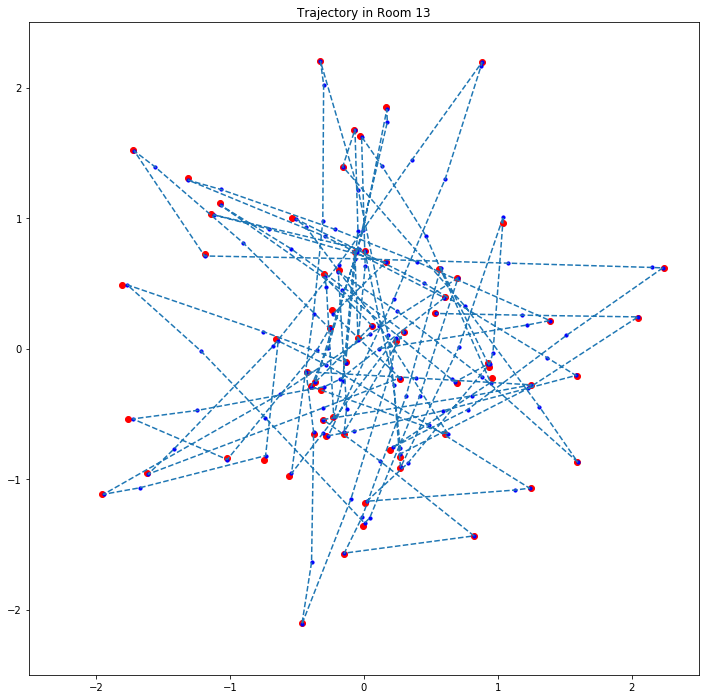

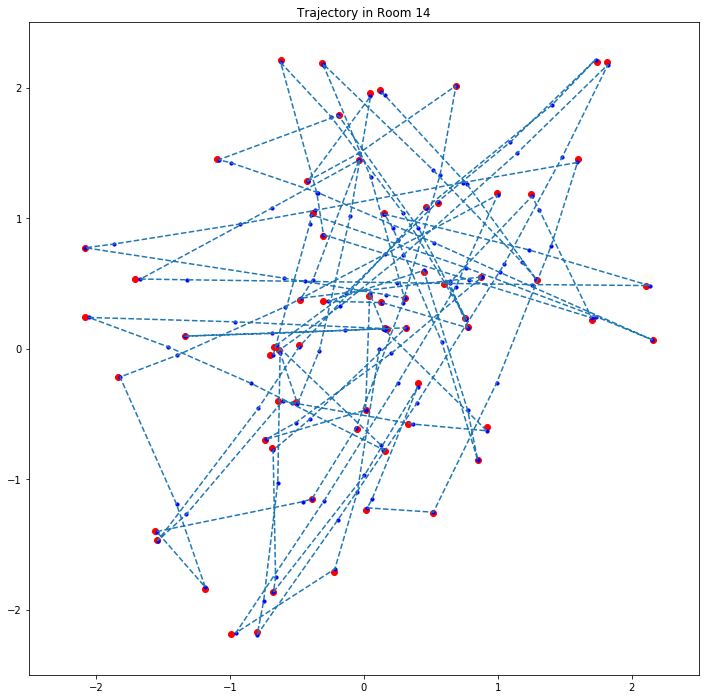

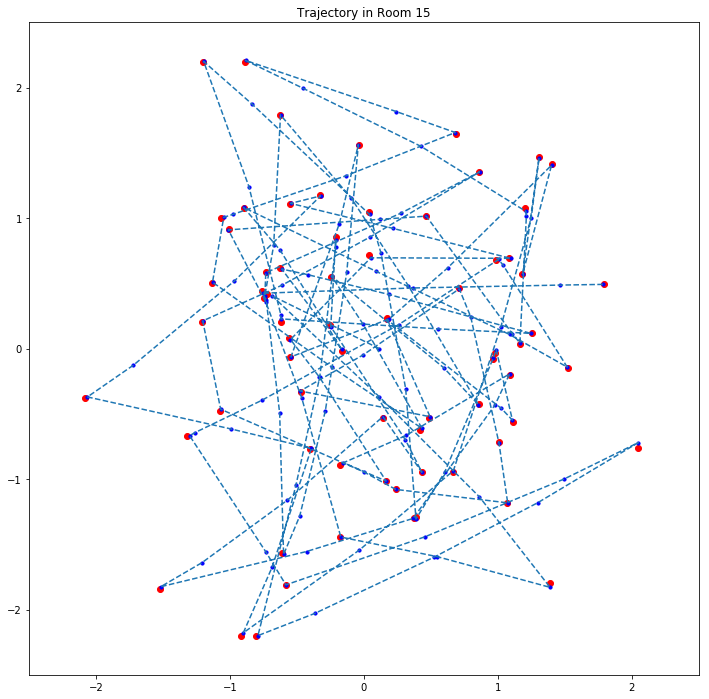

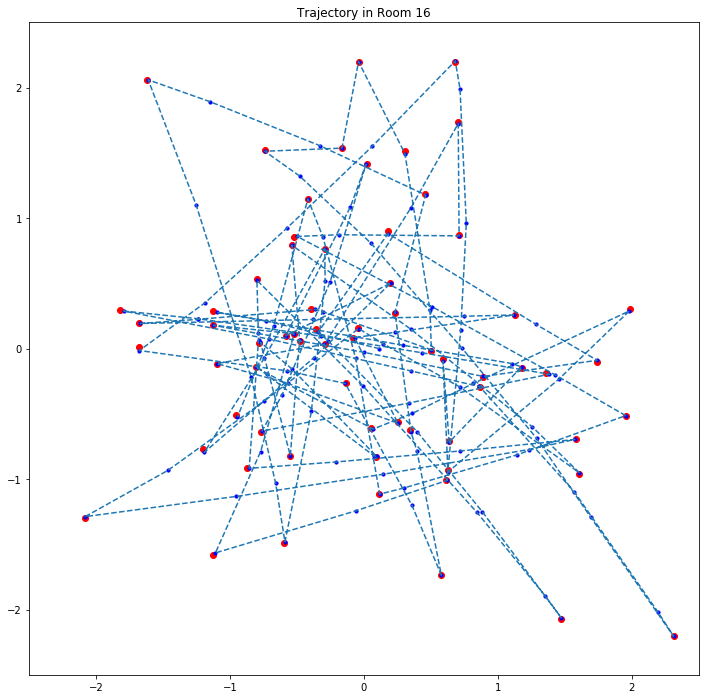

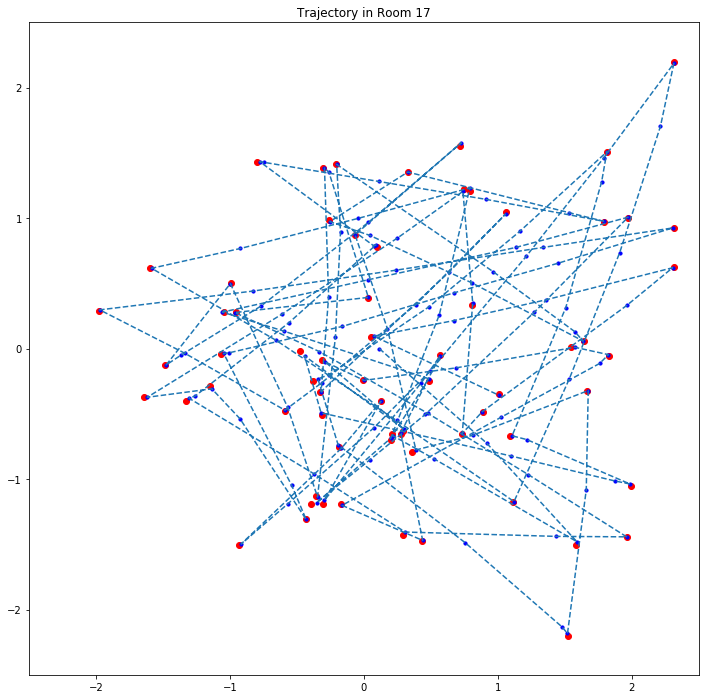

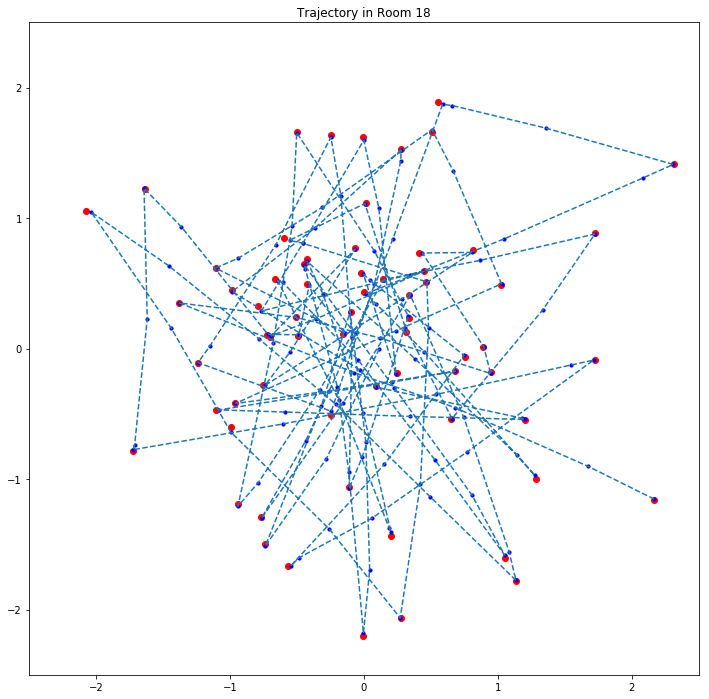

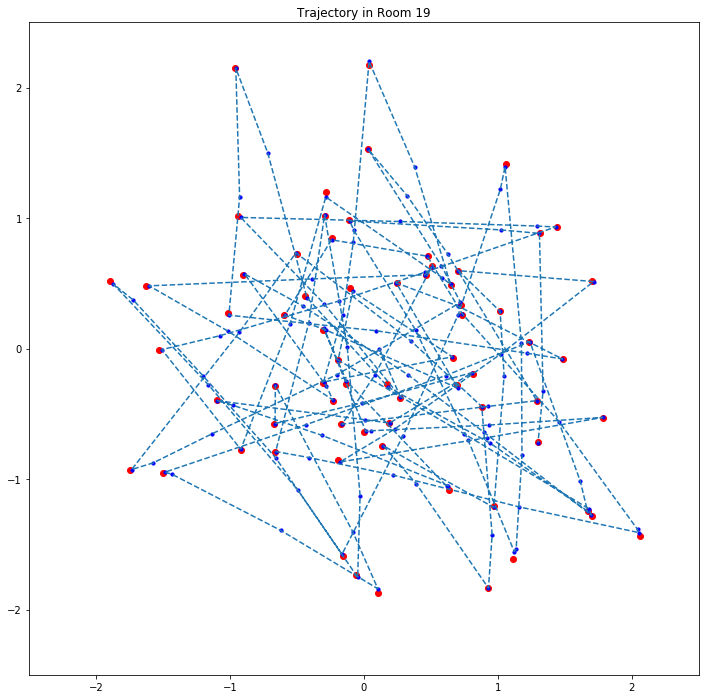

In [12]:
for j in range(20):
    p = []
    for i in range(len(A[j][2])):
        p.append(A[j][2][i][2])
    x = np.array(torch.cat(A[j][1])[:,0].cpu())    
    y = np.array(torch.cat(A[j][1])[:,1].cpu())
    plt.figure(figsize = (12,12))
    plt.ylim(-2.5, 2.5)
    plt.xlim(-2.5, 2.5)
    plt.title("Trajectory in Room "+str(j))
    plt.plot(x,y,linestyle='dashed')
    plt.scatter(np.array(p)[:,0],np.array(p)[:,1],c='r')
    #to show image points
    plt.scatter(x,y,c='b',s = 10)

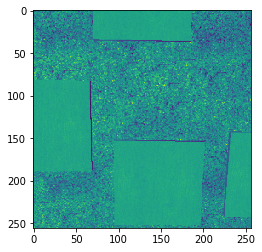

In [13]:
plt.imshow(A[3][0][1][0].cpu().numpy())


In [14]:
len(all_train_labels)

1328

# Test

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 25 01:27:12 2019

@author: abhi

This script contains an (A)CNN-(B)LSTM-(C)safemapper network.
The CNN encodes the visual information, the LSTM evolves its hidden state which is used by the Classifier to come up with a safe-map of the arena.

"""


import torch.nn.functional as F
#import rospy
#check-gpu

import torch 
import torch.nn as nn
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def tensor(obj):
    return torch.tensor(obj, device=device)

class Classifier(nn.Module):

    def __init__(self, K=10):
        
        super(Classifier, self).__init__()
        self.K = K
        self.counter = 0
        self.hidden_rep_dim = 512
        self.input_feature_dim = 128
        
        #pretrained CNN 
        self.CNN = (models.mobilenet_v2(pretrained=True)).to(device)
#         for child in self.CNN.children():
#             for param in child.parameters():
#                 param.requires_grad =False        
        #LSTM random initialization
        self.lstm = nn.LSTM(self.input_feature_dim, self.hidden_rep_dim)        
        self.word_lstm_init_h = nn.Parameter(torch.randn(1, 1, self.hidden_rep_dim).type(torch.FloatTensor), requires_grad=True)
        self.word_lstm_init_c = nn.Parameter(torch.randn(1, 1, self.hidden_rep_dim).type(torch.FloatTensor), requires_grad=True)
        
        #learnable initial hidden state
        self.hidden = (self.word_lstm_init_h,self.word_lstm_init_c)        
        
        #latest evolved hidden state
        self.embedding = None
        
        #Classifier Network
        self.hc1_bn = nn.BatchNorm1d(self.hidden_rep_dim * 2)
        self.fc_hc1 = nn.Linear(self.hidden_rep_dim * 2, 512)
        self.fc_hc1_bn = nn.BatchNorm1d(512)
        self.fc_decode_id = nn.Linear(512, 15)
        self.fc_xy1 = nn.Linear(2, 32)
        self.cat_bn = nn.BatchNorm1d(512 + 32)
        
        self.images = []
        #(x,y) - for all points - to be used as embedding
        self.xy_current = []
        
        #(x,y) - at probe points -to be used as classification 
        self.dropout = nn.Dropout(0.5)
        self.common_1 = nn.Linear(512 + 32, 256)
        self.common_1_bn = nn.BatchNorm1d(256)
        self.common_2 = nn.Linear(256, 128)
        self.common_2_bn = nn.BatchNorm1d(128)
        self.common_3 = nn.Linear(128, 64)
        self.common_3_bn = nn.BatchNorm1d(64)
        self.common_4 = nn.Linear(64, 32)
        self.common_4_bn = nn.BatchNorm1d(32)
        self.final = nn.Linear(32, 1)
        self.encoding_embed1 = nn.Linear(int(self.CNN.classifier[-1].out_features), 256)
        self.encoding_xy = nn.Linear(2, 64)
        self.encoding_hybrid = nn.Linear(320, self.input_feature_dim) 
        
        self.optimizer = torch.optim.Adam(self.parameters(),weight_decay = 0.0001,  lr=0.001)
        self.to(device)
        self.prev_room_data = []
        self.counter_label_list = []
        print(self.parameters())

    def forward_2_batch(self, x):
            
        x1 = F.relu(self.fc_xy1(x))
        embedding = torch.cat(self.embedding,2).squeeze(0)
        x2 = F.relu(self.fc_hc1(embedding.to(device)))
        x2 = torch.repeat_interleave(x2,x1.shape[0]).reshape([x2.shape[1],x1.shape[0]]).t()
        x = torch.cat((x2,x1),1)
        y = F.relu(self.common_1_bn(self.common_1(x)))
        y = F.relu(self.common_2_bn(self.common_2(y)))
        y = F.relu(self.common_3_bn(self.common_3(y)))
        y = F.relu(self.common_4_bn(self.common_4(y)))
        
#         y = F.relu(self.common_1(x))
#         y = F.relu(self.common_2(y))
#         y = F.relu(self.common_3(y))
#         y = F.relu(self.common_4(y))
        y1 = (self.final(y))
        y2 = (-self.final(y))

        return torch.cat((y1, y2),1)
    
    def forward(self, x):
        # Network C
        image_embeddings = F.relu(self.encoding_embed1(self.CNN(torch.cat(self.images).to(device))))
        xy_embeddings = F.relu(self.encoding_xy(torch.cat(self.xy_current).to(device)))
        lstm_input = self.encoding_hybrid(torch.cat((image_embeddings,xy_embeddings),1))
        lstm_input = (lstm_input).view(len(lstm_input), 1, -1)
        print("point lstm input len: ", len(lstm_input)) 
        #Network B
        _ , self.embedding = self.lstm(lstm_input,self.hidden)
        
        #Network A
        x1 = F.relu(self.fc_xy1(x))
        embedding = torch.cat(self.embedding,2).squeeze(0)
        x2 = F.relu(self.fc_hc1(embedding))
        x = torch.cat((x2, x1), 1)
        y = F.relu(self.common_1_bn(self.common_1(x)))
        y = F.relu(self.common_2_bn(self.common_2(y)))
        y = F.relu(self.common_3_bn(self.common_3(y)))
        y = F.relu(self.common_4_bn(self.common_4(y)))
        y1 = (self.final(y))
        y2 = (-self.final(y))
        print('probe_complete')
        return torch.cat((y1, y2),1)
        
    def forward_batch(self, Data, x, N):
        #print("batch data sizes ", Data[1])
        x1 = F.relu(self.dropout(self.fc_xy1(x)))
        hidden_1 = torch.cat([self.hidden[0]]*N,1)
        hidden_2 = torch.cat([self.hidden[1]]*N,1)
        _, embedding = self.lstm(Data,(hidden_1,hidden_2))
        embedding = self.hc1_bn(torch.cat(embedding,2).squeeze(0))
        x2 = F.relu(self.fc_hc1(embedding))

        x = self.cat_bn(torch.cat((x2, x1),1))
        
        y = F.relu(self.common_1_bn(self.common_1(x)))
        y = F.relu(self.common_2_bn(self.common_2(y)))
        y = F.relu(self.common_3_bn(self.common_3(y)))
        y = F.relu(self.common_4_bn(self.common_4(y)))
        
#         y = F.relu(self.common_1(x))
#         y = F.relu(self.common_2(y))
#         y = F.relu(self.common_3(y))
#         y = F.relu(self.common_4(y))
        
        y1 = (self.final(y))
        y2 = (-self.final(y))
        return torch.cat((y1, y2),1)

    def store_image(self,xy,image):
        
        xy = [[float(xy[0]), float(xy[1])]]
        xy = tensor(xy)
        self.counter += 1
        image = tensor(image).float()
        image = image.unsqueeze(0) 
        self.images.append(image)
        self.xy_current.append(xy)

    def latent_state(self):

        return(np.array(torch.cat(self.hidden,2).data.squeeze(0).squeeze(0).cpu()))
    
    def get_loss(self,x,label):
        
        with torch.no_grad():
            self.eval()
            self.CNN.eval()
            y = [[float(x[0]), float(x[1])]]
            y = tensor(y)
            label = np.array([label], dtype = long)
            label = tensor(label)
            loss_function = nn.CrossEntropyLoss()
            pred = self.forward(y)
            print("point xy", x)
            print("point (get loss) pred",pred)
            loss = loss_function(pred, label)#torch.tensor(1,dtype = torch.long))
            return(float(np.array(loss.data.cpu())))

    def get_batch_loss(self,x,label):
          
        with torch.no_grad():
            self.eval()
            y = np.array(x,dtype=np.float32)
            y=tensor(y)
            loss_function = nn.CrossEntropyLoss()
            pred = self.forward_2_batch(y)
            label = np.array(label, dtype = long)
            label = tensor(label).t()
            loss = loss_function(pred, label)#torch.tensor(1,dtype = torch.long))
            return(float(np.array(loss.data.cpu())))

    def get_batch_confidence(self,x):
        
        with torch.no_grad():
            self.eval()
            y = np.array(x,dtype=np.float32)
            y=tensor(y)
            pred = self.forward_2_batch(y)

            return(np.array(torch.max(F.softmax(pred),1)[0].cpu()))

    def get_batch_accuracy(self,x,labels):
        
        with torch.no_grad():
            self.eval()
            y = np.array(x,dtype=np.float32)
            y=tensor(y)
            pred = self.forward_2_batch(y)            
            temp = F.softmax(pred)[:,1]>0.5
            correct = (np.array(temp.cpu()) == np.array(labels)) 
            return(float(np.sum(correct))/len(correct))
            
    def get_loss_evolved(self,x,label):
        
        with torch.no_grad():
            self.eval()
            y = [[float(x[0]), float(x[1])]]
            y=tensor(y)
            loss_function = nn.CrossEntropyLoss()
            pred = self.forward_2(y)
            label = np.array([label], dtype = long)
            label = tensor(label)       
            loss = loss_function(pred, label)#torch.tensor(1,dtype = torch.long))
            return(float(np.array(loss.data.cpu())))
    
    def train_classifier_prev(self):
        print("starting training on prev")
        start = time.time()
        for epoch in range(5):
            # total_Data = []
            rooms = np.random.permutation(15)
            progress = 0
            for r in rooms:
                self.train()
                self.CNN.train()
                progress += 1
                #                 if progress % 5 == 0:
                #                     print('current epoch progress: ', progress)
                room_images, xy_room, counter_label_list = self.prev_room_data[r]
                with torch.no_grad():
                    image_features = F.relu(self.CNN(room_images.to(device)))
                image_embeddings = F.relu(self.encoding_embed1(image_features))
                xy_embeddings = F.relu(self.encoding_xy(torch.cat(xy_room).to(device)))
                embeddings = self.encoding_hybrid(torch.cat((image_embeddings, xy_embeddings), 1))
                max_length = counter_label_list[-1][0]

                n_labels = len(counter_label_list)
                # Create empty data matrix
                Data = torch.zeros(n_labels, max_length, 128).to(device)
                Data_lengths = torch.zeros(n_labels).to(device)
                xy_list = torch.zeros(n_labels, 2).to(device)
                labels = torch.zeros(n_labels).long().to(device)
                for j, info in enumerate(counter_label_list[::-1]):
                    Data[j][0:info[0]] = embeddings[0:info[0]]
                    Data_lengths[j] = info[0]
                    labels[j] = info[1]
                    xy_list[j] = tensor(info[2])
                packed = torch.nn.utils.rnn.pack_padded_sequence(Data, Data_lengths, batch_first=True)
                hidden_1 = torch.cat([self.hidden[0]] * n_labels, 1)
                hidden_2 = torch.cat([self.hidden[1]] * n_labels, 1)
                _, final_states = self.lstm(packed, (hidden_1, hidden_2))
                # print(final_states[0].shape)
                seqs = np.random.permutation(n_labels)

                bs = 64
                for seq in seqs:
                    loss_function = nn.CrossEntropyLoss(weight=tensor([0.25, 0.75]).float())
                    self.embedding = (final_states[0][0][seq].unsqueeze(0).unsqueeze(0),
                                      final_states[1][0][seq].unsqueeze(0).unsqueeze(0))
                    # print(self.embedding[0].shape)
                    pred = self.forward_2_batch(xy_list[:bs])

                    loss = loss_function(pred, labels[:bs].t())  # torch.tensor(1,dtype = torch.long))

                    loss.backward(retain_graph=True)
                    self.optimizer.step()
                _, self.embedding = self.lstm(embeddings[0:max_length].view(max_length, 1, -1), self.hidden)
                room_train_pos = []
                room_train_labels = []
                for _, label, pos in counter_label_list:
                    room_train_pos.append(pos)
                    room_train_labels.append(label)
                room_acc = self.get_batch_accuracy(room_train_pos, room_train_labels)
                room_loss = self.get_batch_loss(room_train_pos, room_train_labels)
                print('epoch %d room %2d: roomloss  %.4f  roomacc  %.4f  totaltime(s) %.2f' %
                      (epoch + 1, r + 1, room_loss, room_acc, time.time() - start))


    #                 train_acc = self.get_batch_accuracy(first_train_pos, first_train_labels)
    #                 train_loss = self.get_batch_loss(first_train_pos, first_train_labels)
    #                 val_acc = self.get_batch_accuracy(val_train_pos, val_train_labels)
    #                 #val_loss = self.get_batch_loss(val_train_pos, val_train_labels)
    #                 if epoch % 1 == 0:
    #                         print('epoch %d room %2d: trainloss  %.4f  trainacc  %.4f  valacc  %.4f  totaltime(s) %.2f' %
    #                               (epoch + 1, r + 1, train_loss, train_acc, val_acc, time.time() - start))
    #             hist.append(train_acc)
    #             val_hist.append(val_acc)

    def train_full(self, K=15, max_epochs=300, holdout=0, min_seq_len=1):
        print("starting training on prev")
        start = time.time()
        rooms = range(K)
        
        room_data = []
        for r in rooms:
            cll = self.prev_room_data[r][2]
            for seq_len in range(min_seq_len, cll[-1][0]):
#                 for max_pred_idx in range(len(cll)):
#                     if cll[max_pred_idx][0] > seq_len:
#                         break
                for pred_idx in range(len(cll)):
                    room_data.append([r, seq_len, pred_idx])
        room_data = np.array(room_data, dtype=int)
        np.random.shuffle(room_data)
        room_data = room_data[:int(len(room_data) * (1 - holdout))]
        print('total training data points: ', len(room_data))
        for epoch in range(max_epochs):
            curr_hist = []
            np.random.shuffle(room_data)
            bs = 128
            batches = len(room_data) / bs
            for i in range(batches):
                self.train()
                self.CNN.train()
                # print('room', r, 'batch', i)
                inputs = np.array(room_data[i * bs:(i + 1) * bs])
                sort_idxs = np.argsort(-inputs[:, 1], axis=0)
                inputs = inputs[sort_idxs]

                max_length = inputs[0][1]
                # Create empty data matrix
                Data = torch.zeros(bs, max_length, 128).to(device)
                Data_lengths = torch.zeros(bs).to(device)
                xy_list = torch.zeros(bs, 2).to(device)
                labels = torch.zeros(bs).long().to(device)
                seq_images = []
                for j, (r, seq_len, pred_idx) in enumerate(inputs):
                    #if j==0: print(r, seq_len, pred_idx)
                    seq_images = self.prev_room_data[r][0][:seq_len]
                    seq_xy = self.prev_room_data[r][1][:seq_len]
                    with torch.no_grad():
                        image_features = F.relu(self.CNN(seq_images.to(device)))
                    image_embeddings = F.relu(self.encoding_embed1(image_features))
                    xy_embeddings = F.relu(self.encoding_xy(torch.cat(seq_xy).to(device)))
                    embeddings = self.encoding_hybrid(torch.cat((image_embeddings, xy_embeddings), 1))
                    
                    Data[j][:seq_len] = embeddings[0:seq_len]
                    Data_lengths[j] = (seq_len)
                    labels[j] = (self.prev_room_data[r][2][pred_idx][1])
                    xy_list[j] = tensor(self.prev_room_data[r][2][pred_idx][2])
                loss_function = nn.CrossEntropyLoss(weight=tensor([0.25, 0.75]).float())
                packed = torch.nn.utils.rnn.pack_padded_sequence(Data, Data_lengths, batch_first=True)
                pred = self.forward_batch(packed, xy_list, bs)
                loss = loss_function(pred, labels.t())  # torch.tensor(1,dtype = torch.long))

                loss.backward(retain_graph=False)
                self.optimizer.step()
                if i%1 == 0:
                    print('\r epoch %d batch %d/%d: minibatch loss %.4f  time %.2f' % 
                          (epoch + 1, i + 1, batches + 1, loss.data, time.time() - start))
                curr_hist.append(float(loss.data))
            hist.append(np.mean(curr_hist))
#                 _, self.embedding = self.lstm(embeddings[0:max_length].view(max_length, 1, -1), self.hidden)
#                 train_acc = self.get_batch_accuracy(all_train_pos, all_train_labels)
#                 if epoch % 1 == 0:
#                         print('epoch', epoch + 1, 'room', r, " all train loss:",self.get_batch_loss(all_train_pos, all_train_labels),
#                               ' all train acc', train_acc, ' time elapsed', time.time() - start)
                
    def forward_decode(self, Data, N):
        hidden_1 = torch.cat([self.hidden[0]]*N,1)
        hidden_2 = torch.cat([self.hidden[1]]*N,1)
        _, embedding = self.lstm(Data,(hidden_1,hidden_2))
        embedding = torch.cat(embedding,2).squeeze(0)
        embedding = self.hc1_bn(embedding)
        x2 = F.relu(self.fc_hc1_bn(self.fc_hc1(embedding)))
        return self.fc_decode_id(x2)
    
    def forward_2_decode(self):
        embedding = torch.cat(self.embedding,2).squeeze(0)
        embedding = self.hc1_bn(embedding)
        x2 = F.relu(self.fc_hc1_bn(self.fc_hc1(embedding)))
        return self.fc_decode_id(x2)
    
    def train_decode(self, max_epochs=30):
        print("starting training on prev")
        
        start = time.time()
        rooms = range(self.K)
        room_data = []
        for r in rooms:
            cll = self.prev_room_data[r][2]
            for seq_len in range(1, cll[-1][0]):
                room_data.append([r, seq_len])
        room_data = np.array(room_data, dtype=int)
        print('total training data points: ', len(room_data))
        for epoch in range(max_epochs):
            current_epoch_hist = []
            np.random.shuffle(room_data)
            bs = 128
            batches = len(room_data) / bs
            for i in range(batches):
                self.train()
                self.CNN.train()
                # print('room', r, 'batch', i)
                inputs = np.array(room_data[i * bs:(i + 1) * bs])
                sort_idxs = np.argsort(-inputs[:, 1], axis=0)
                inputs = inputs[sort_idxs]

                max_length = inputs[0][1]
                # Create empty data matrix
                Data = torch.zeros(bs, max_length, 128).to(device)
                Data_lengths = torch.zeros(bs).to(device)
                labels = torch.zeros(bs).long().to(device)
                seq_images = []
                for j, (r, seq_len) in enumerate(inputs):
                    seq_images = self.prev_room_data[r][0][:seq_len]
                    seq_xy = self.prev_room_data[r][1][:seq_len]
                    with torch.no_grad():
                        image_features = F.relu(self.CNN(seq_images.to(device)))
                    image_embeddings = F.relu(self.encoding_embed1(image_features))
                    xy_embeddings = F.relu(self.encoding_xy(torch.cat(seq_xy).to(device)))
                    embeddings = self.encoding_hybrid(torch.cat((image_embeddings, xy_embeddings), 1))
                    embeddings = F.relu(embeddings)
                    
                    Data[j][:seq_len] = embeddings[0:seq_len]
                    Data_lengths[j] = (seq_len)
                    labels[j] = r
                loss_function = nn.CrossEntropyLoss()
                packed = torch.nn.utils.rnn.pack_padded_sequence(Data, Data_lengths, batch_first=True)
                pred = self.forward_decode(packed, bs)
                loss = loss_function(pred, labels.t())  # torch.tensor(1,dtype = torch.long))

                loss.backward(retain_graph=False)
                self.optimizer.step()
                if i%1 == 0:
                    print('\r epoch %d batch %d/%d: minibatch loss %.4f  time %.2f' % 
                          (epoch + 1, i + 1, batches, float(loss.data), time.time() - start))
                    current_epoch_hist.append(float(loss.data))
            print('example predictions: ', pred[0])
            print('EPOCH AVG LOSS: ', np.mean(current_epoch_hist))
            hist.append(np.mean(current_epoch_hist))

                    
    def train_decode_from_labels(self, max_epochs=300):
        print("starting training on prev")
        start = time.time()
        rooms = range(self.K)
        room_data = []
        for r in rooms:
            cll = self.prev_room_data[r][2]
            for seq_len in range(2, len(cll)):
                room_data.append([r, seq_len])
        room_data = np.array(room_data, dtype=int)
        print('total training data points: ', len(room_data))
        for epoch in range(max_epochs):
            np.random.shuffle(room_data)
            bs = 128
            batches = len(room_data) / bs
            for i in range(batches):
                self.train()
                self.CNN.train()
                # print('room', r, 'batch', i)
                inputs = np.array(room_data[i * bs:(i + 1) * bs])
                sort_idxs = np.argsort(-inputs[:, 1], axis=0)
                inputs = inputs[sort_idxs]

                max_length = inputs[0][1]
                # Create empty data matrix
                Data = torch.zeros(bs, max_length, self.input_feature_dim).to(device)
                Data_lengths = torch.zeros(bs).to(device)
                labels = torch.zeros(bs).long().to(device)
                seq_images = []
                for j, (r, seq_len) in enumerate(inputs):
                    embeddings = torch.zeros(seq_len, self.K).to(device)
                    for k in range(seq_len):
                        embeddings[k][r] = 1.
                    
                    Data[j][:seq_len] = embeddings[0:seq_len]
                    Data_lengths[j] = (seq_len)
                    labels[j] = r
                loss_function = nn.CrossEntropyLoss()
                packed = torch.nn.utils.rnn.pack_padded_sequence(Data, Data_lengths, batch_first=True)
                pred = self.forward_decode(packed, bs)
                loss = loss_function(pred, labels.t())  # torch.tensor(1,dtype = torch.long))

                loss.backward(retain_graph=False)
                self.optimizer.step()
            if epoch % 2 == 0:
                print('\r epoch %d batch %d/%d: minibatch loss %.4f  time %.2f' % 
                      (epoch + 1, i + 1, batches, loss.data, time.time() - start))
                if epoch % 8 == 0:
                    print(pred[0])

In [16]:
def init_xavier(m, gain=1.):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight, gain)
        m.bias.data.zero_()
#del Clf.prev_room_data
#del Clf
torch.cuda.empty_cache()

In [17]:


Clf = Classifier(K=15)
hist = []
Clf.prev_room_data = A 


<generator object parameters at 0x7fe6b1db3640>


In [18]:
Clf.optimizer = torch.optim.Adam(Clf.parameters(), weight_decay = 0.00001,  lr=0.00005, amsgrad=True)
Clf.train_full(holdout=0.99, min_seq_len=132) #GARB

starting training on prev
('total training data points: ', 184)
 epoch 1 batch 1/2: minibatch loss 0.7219  time 18.03
 epoch 2 batch 1/2: minibatch loss 0.6992  time 35.90
 epoch 3 batch 1/2: minibatch loss 0.6679  time 53.81
 epoch 4 batch 1/2: minibatch loss 0.6545  time 71.58
 epoch 5 batch 1/2: minibatch loss 0.6498  time 89.52
 epoch 6 batch 1/2: minibatch loss 0.6255  time 107.58
 epoch 7 batch 1/2: minibatch loss 0.6543  time 125.43
 epoch 8 batch 1/2: minibatch loss 0.6061  time 143.20
 epoch 9 batch 1/2: minibatch loss 0.6037  time 161.12
 epoch 10 batch 1/2: minibatch loss 0.5615  time 179.12
 epoch 11 batch 1/2: minibatch loss 0.5827  time 197.03
 epoch 12 batch 1/2: minibatch loss 0.5363  time 214.91
 epoch 13 batch 1/2: minibatch loss 0.5663  time 232.74
 epoch 14 batch 1/2: minibatch loss 0.5727  time 250.59
 epoch 15 batch 1/2: minibatch loss 0.5135  time 268.67
 epoch 16 batch 1/2: minibatch loss 0.5296  time 286.51
 epoch 17 batch 1/2: minibatch loss 0.5413  time 304.2

KeyboardInterrupt: 

In [ ]:
print(hist)
plt.title('lr=0.0002, wd=0.0001, amsgrad')
plt.plot(hist) 

In [ ]:
#Not required
All_images=[]
for i in range(20):
    All_images.append(A[i][0])
All_images = torch.cat(All_images)

All_xy=[]
for i in range(20):
    All_labels.append(torch.cat(A[i][1]))
All_xy = torch.cat(All_xy)
print(All_xy.shape,All_images.shape)

In [ ]:
Clf = Classifier()
Clf.parameters

In [ ]:
list(Clf.parameters())

In [ ]:
#create [counter, label, xy, room] pool
data = pd.DataFrame(A[0][2])
data['room'] = 0

for i in range(1,20):
    temp = pd.DataFrame(A[i][2])
    temp['room'] = i
    data = pd.concat([data, temp], ignore_index=True, sort=False)
    

In [ ]:
leng = 15
plt.plot(range(1, leng), hist[:leng], label='train')
plt.plot(range(1, leng), val_hist[:leng], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.title('lr=0.00001')
plt.ylim(0.5, 1.0)
plt.xticks(range(2, leng + 1, 2))
plt.grid()
plt.show()

In [23]:
model = Classifier(K=15)
model.load_state_dict(torch.load('/home/azav/results/id_decoder_weights.pth'))
model.prev_room_data = A
hist = []
val_hist = [0] * len(hist)

<generator object parameters at 0x7fe6b1cd3c30>


In [24]:
model.optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.00005,  lr=0.0003, amsgrad=True)
model.train_full(K=15, holdout=0.9, min_seq_len=128)

starting training on prev
('total training data points: ', 2241)
 epoch 1 batch 1/18: minibatch loss 0.7273  time 8.37
 epoch 1 batch 2/18: minibatch loss 0.7282  time 16.65
 epoch 1 batch 3/18: minibatch loss 0.7509  time 24.98
 epoch 1 batch 4/18: minibatch loss 0.6796  time 33.25
 epoch 1 batch 5/18: minibatch loss 0.6641  time 41.55
 epoch 1 batch 6/18: minibatch loss 0.6891  time 49.85
 epoch 1 batch 7/18: minibatch loss 0.6868  time 58.10
 epoch 1 batch 8/18: minibatch loss 0.7028  time 66.39
 epoch 1 batch 9/18: minibatch loss 0.7184  time 74.76
 epoch 1 batch 10/18: minibatch loss 0.6945  time 82.99
 epoch 1 batch 11/18: minibatch loss 0.7080  time 91.26
 epoch 1 batch 12/18: minibatch loss 0.6613  time 99.60
 epoch 1 batch 13/18: minibatch loss 0.6854  time 107.85
 epoch 1 batch 14/18: minibatch loss 0.6821  time 116.12
 epoch 1 batch 15/18: minibatch loss 0.6872  time 124.43
 epoch 1 batch 16/18: minibatch loss 0.6859  time 132.68
 epoch 1 batch 17/18: minibatch loss 0.6795  

KeyboardInterrupt: 

In [ ]:
plt.plot(hist)
#plt.plot(val_hist)


In [ ]:
#pickle.dump(Clf.embedding, open('/home/azav/results/cool_state.p', 'wb'))
#torch.save(Clf.state_dict(), '/home/azav/results/id_decoder_weights.pth')

In [ ]:
del model.prev_room_data
del model
torch.cuda.empty_cache()

In [ ]:
#plt.plot(hist) #all train loss:', 0.26439836621284485, ' all train acc', 0.8683220466516177,
#epoch 8 room  5: trainloss  0.1767  trainacc  0.9233  valacc  0.8840  totaltime(s) 1495.33
print(Clf.get_batch_accuracy(first_train_pos, first_train_labels))

In [ ]:
model = Clf
model.eval()
for r_seq in range(15):
    with torch.no_grad():
        room_images,xy_room,counter_label_list =model.prev_room_data[r_seq]
        image_features = F.relu(model.CNN(room_images.to(device)))
        image_embeddings = F.relu(model.encoding_embed1(image_features))
        xy_embeddings = F.relu(model.encoding_xy(torch.cat(xy_room).to(device)))
        embeddings = model.encoding_hybrid(torch.cat((image_embeddings,xy_embeddings),1))

        max_length = counter_label_list[-1][0]
        _, model.embedding = model.lstm(embeddings[0:25].view(25, 1, -1), model.hidden)
        pred = model.forward_2_decode()
        _, pred_class = torch.max(pred, 1)
        print(r_seq, float(pred_class))

tensor([[ 0.0744, -0.0744],
        [ 0.0592, -0.0592],
        [ 0.0323, -0.0323],
        ...,
        [ 0.3211, -0.3211],
        [ 0.2899, -0.2899],
        [ 0.2721, -0.2721]], device='cuda:0')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


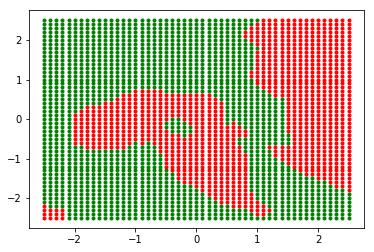

tensor([[ 0.0738, -0.0738],
        [ 0.0587, -0.0587],
        [ 0.0319, -0.0319],
        ...,
        [ 0.3211, -0.3211],
        [ 0.2902, -0.2902],
        [ 0.2726, -0.2726]], device='cuda:0')


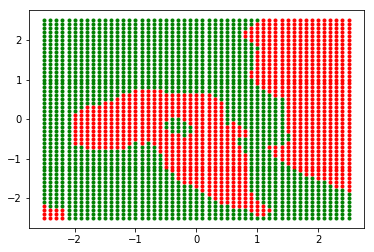

tensor([[ 0.0749, -0.0749],
        [ 0.0597, -0.0597],
        [ 0.0330, -0.0330],
        ...,
        [ 0.3209, -0.3209],
        [ 0.2900, -0.2900],
        [ 0.2723, -0.2723]], device='cuda:0')


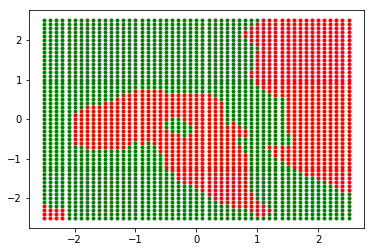

tensor([[ 0.0751, -0.0751],
        [ 0.0598, -0.0598],
        [ 0.0327, -0.0327],
        ...,
        [ 0.3198, -0.3198],
        [ 0.2891, -0.2891],
        [ 0.2714, -0.2714]], device='cuda:0')


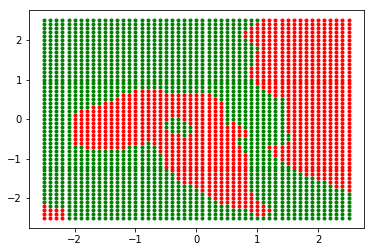

tensor([[ 0.0745, -0.0745],
        [ 0.0594, -0.0594],
        [ 0.0322, -0.0322],
        ...,
        [ 0.3204, -0.3204],
        [ 0.2897, -0.2897],
        [ 0.2721, -0.2721]], device='cuda:0')


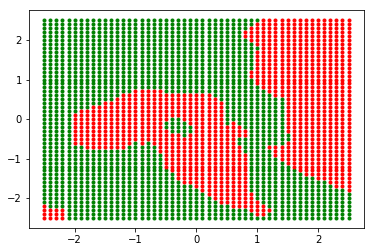

tensor([[ 0.0754, -0.0754],
        [ 0.0600, -0.0600],
        [ 0.0327, -0.0327],
        ...,
        [ 0.3213, -0.3213],
        [ 0.2905, -0.2905],
        [ 0.2728, -0.2728]], device='cuda:0')


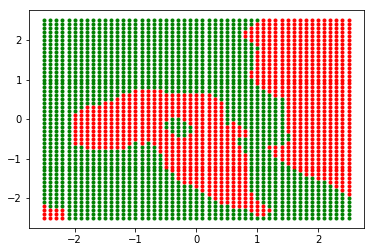

tensor([[ 0.0746, -0.0746],
        [ 0.0595, -0.0595],
        [ 0.0329, -0.0329],
        ...,
        [ 0.3212, -0.3212],
        [ 0.2903, -0.2903],
        [ 0.2726, -0.2726]], device='cuda:0')


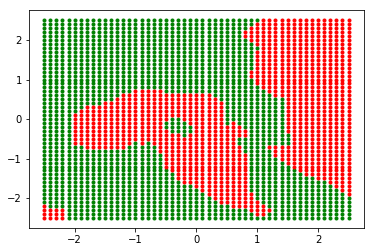

tensor([[ 0.0737, -0.0737],
        [ 0.0584, -0.0584],
        [ 0.0319, -0.0319],
        ...,
        [ 0.3199, -0.3199],
        [ 0.2892, -0.2892],
        [ 0.2716, -0.2716]], device='cuda:0')


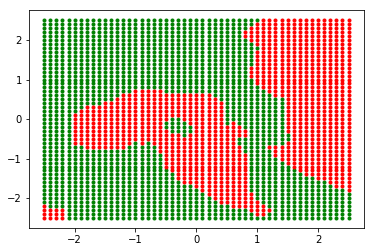

tensor([[ 0.0754, -0.0754],
        [ 0.0601, -0.0601],
        [ 0.0328, -0.0328],
        ...,
        [ 0.3207, -0.3207],
        [ 0.2903, -0.2903],
        [ 0.2726, -0.2726]], device='cuda:0')


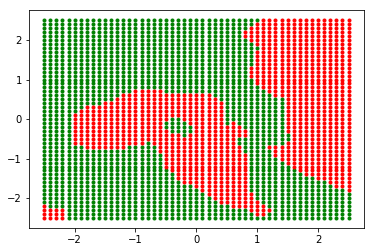

tensor([[ 0.0744, -0.0744],
        [ 0.0593, -0.0593],
        [ 0.0326, -0.0326],
        ...,
        [ 0.3201, -0.3201],
        [ 0.2895, -0.2895],
        [ 0.2717, -0.2717]], device='cuda:0')


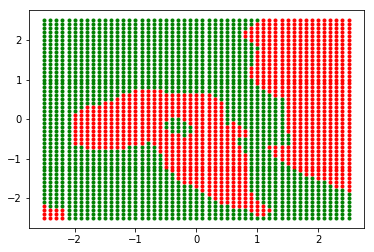

tensor([[ 0.0738, -0.0738],
        [ 0.0587, -0.0587],
        [ 0.0326, -0.0326],
        ...,
        [ 0.3209, -0.3209],
        [ 0.2899, -0.2899],
        [ 0.2723, -0.2723]], device='cuda:0')


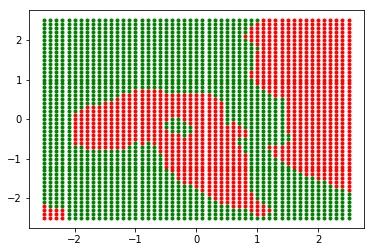

tensor([[ 0.0747, -0.0747],
        [ 0.0594, -0.0594],
        [ 0.0320, -0.0320],
        ...,
        [ 0.3201, -0.3201],
        [ 0.2896, -0.2896],
        [ 0.2719, -0.2719]], device='cuda:0')


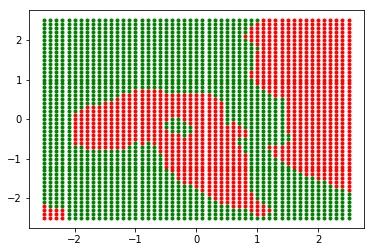

tensor([[ 0.0727, -0.0727],
        [ 0.0574, -0.0574],
        [ 0.0306, -0.0306],
        ...,
        [ 0.3202, -0.3202],
        [ 0.2886, -0.2886],
        [ 0.2707, -0.2707]], device='cuda:0')


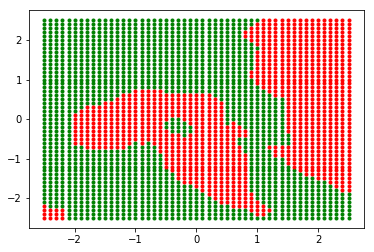

tensor([[ 0.0748, -0.0748],
        [ 0.0595, -0.0595],
        [ 0.0325, -0.0325],
        ...,
        [ 0.3207, -0.3207],
        [ 0.2896, -0.2896],
        [ 0.2718, -0.2718]], device='cuda:0')


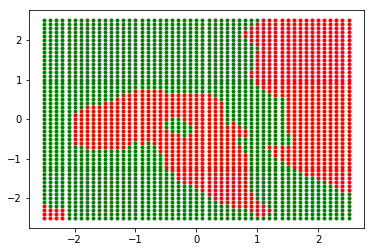

tensor([[ 0.0751, -0.0751],
        [ 0.0599, -0.0599],
        [ 0.0341, -0.0341],
        ...,
        [ 0.3210, -0.3210],
        [ 0.2904, -0.2904],
        [ 0.2730, -0.2730]], device='cuda:0')


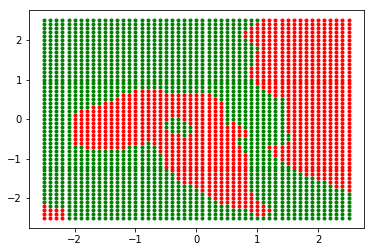

In [25]:
garb = []
for i in np.arange(-2.5, 2.6, 0.1):
    for j in np.arange(-2.5, 2.6, 0.1):
        garb.append([i, j])
        
model = model
for r_seq in range(model.K):
    with torch.no_grad():
        room_images,xy_room,counter_label_list =model.prev_room_data[r_seq]
        image_features = F.relu(model.CNN(room_images.to(device)))
        image_embeddings = F.relu(model.encoding_embed1(image_features))
        xy_embeddings = F.relu(model.encoding_xy(torch.cat(xy_room).to(device)))
        embeddings = model.encoding_hybrid(torch.cat((image_embeddings, xy_embeddings), 1))
        embeddings = F.relu(embeddings)

        max_length = counter_label_list[-1][0]
        _, model.embedding = model.lstm(embeddings[0:max_length].view(max_length, 1, -1), model.hidden)
        pred = model.forward_2_batch(tensor(garb))
        print(pred)
        pred_class = F.softmax(pred)[:,1]>0.5

    def plot_pool(pool, labels):
        xs1, ys1, xs0, ys0 = [], [], [], []
        for i, e in enumerate(pool):
            if labels[i] == 0:
                xs0.append(e[0])
                ys0.append(e[1])
            else:
                xs1.append(e[0])
                ys1.append(e[1])
        plt.plot(xs1, ys1, 'g.')
        plt.plot(xs0, ys0, 'r.')
        plt.show()

    plot_pool(garb, pred_class)
    


In [ ]:

model = Clf
for r_seq in range(10):
    with torch.no_grad():
        room_images,xy_room,counter_label_list =model.prev_room_data[r_seq]
        image_features = F.relu(model.CNN(room_images.to(device)))
        image_embeddings = F.relu(model.encoding_embed1(image_features))
        xy_embeddings = F.relu(model.encoding_xy(torch.cat(xy_room).to(device)))
        embeddings = model.encoding_hybrid(torch.cat((image_embeddings,xy_embeddings),1))

        max_length = counter_label_list[-1][0]
        _, model.embedding = model.lstm(embeddings[0:max_length].view(max_length, 1, -1), model.hidden)
        room_train_pos = []
        room_train_labels = []
        for _, label, pos in counter_label_list:
            room_train_pos.append(pos)
            room_train_labels.append(label)
        room_acc = model.get_batch_accuracy(room_train_pos, room_train_labels)
        print(room_acc)

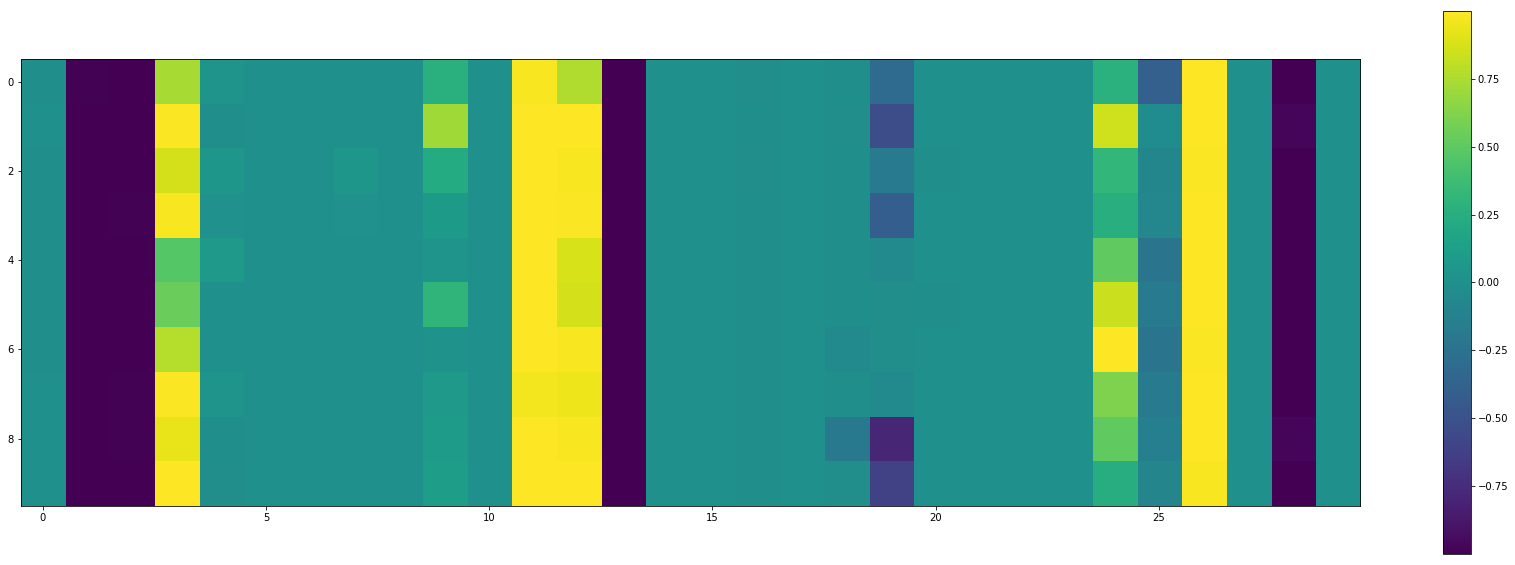

In [28]:
embedding_hist = torch.zeros(10, 512)
model = model
for r_seq in range(10):
    with torch.no_grad():
        room_images,xy_room,counter_label_list = model.prev_room_data[r_seq]
        image_features = F.relu(model.CNN(room_images.to(device)))
        image_embeddings = F.relu(model.encoding_embed1(image_features))
        xy_embeddings = F.relu(model.encoding_xy(torch.cat(xy_room).to(device)))
        embeddings = model.encoding_hybrid(torch.cat((image_embeddings,xy_embeddings),1))

        max_length = counter_label_list[-1][0]
        _, model.embedding = model.lstm(embeddings[0:max_length].view(max_length, 1, -1), model.hidden)
        embedding_hist[r_seq] = model.embedding[0][0][0]
        
#         for i, e in enumerate(range(1, 21)):
#             print(i, e)
#             _, model.embedding = model.lstm(embeddings[0:e].view(e, 1, -1), model.hidden)
#             embedding_hist[i] = model.embedding[0][0][0]
            
plt.figure(figsize = (30,10))
plt.imshow(embedding_hist.numpy()[:,:30])
#plt.clim(-0.05, 0.05)
plt.colorbar()
plt.show() 